# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [3]:
!ls

Angie.ipynb  Harris.ipynb  Samuel.ipynb   Timothy.ipynb
desktop.ini  Isaac.ipynb   Test_data.csv  Train_data.csv


## Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# SVM
from sklearn.svm import SVC

## Intrusion Data

In [5]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [6]:
intrusion_data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [7]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

normal     53.385996
anomaly    46.614004
Name: class, dtype: float64


# Preprocessing

In [8]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [9]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: duration, Length: 758, dtype: int64
------------
Counts for protocol_type:
tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
------------
Counts for service:
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
------------
Counts for flag:
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64
------------
Counts for src_bytes:
0        9866
8         738
1         480
44        467
45        416
         ... 
3724        1
44788       1
1205    

#Attribute Analyses and Input selection

In [10]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
intrusion_data = pd.read_csv('Train_data.csv')

In [12]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [13]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [14]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                   0.564013
dst_bytes                   0.437521
diff_srv_rate               0.355150
same_srv_rate               0.354928
dst_host_srv_count          0.331307
dst_host_same_srv_rate      0.308207
dst_host_diff_srv_rate      0.287300
dst_host_serror_rate        0.283786
logged_in                   0.280175
dst_host_srv_serror_rate    0.276623
dtype: float64


In [15]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [16]:
intrusion_data_right['class_label'].value_counts()

0    13449
1    11743
Name: class_label, dtype: int64

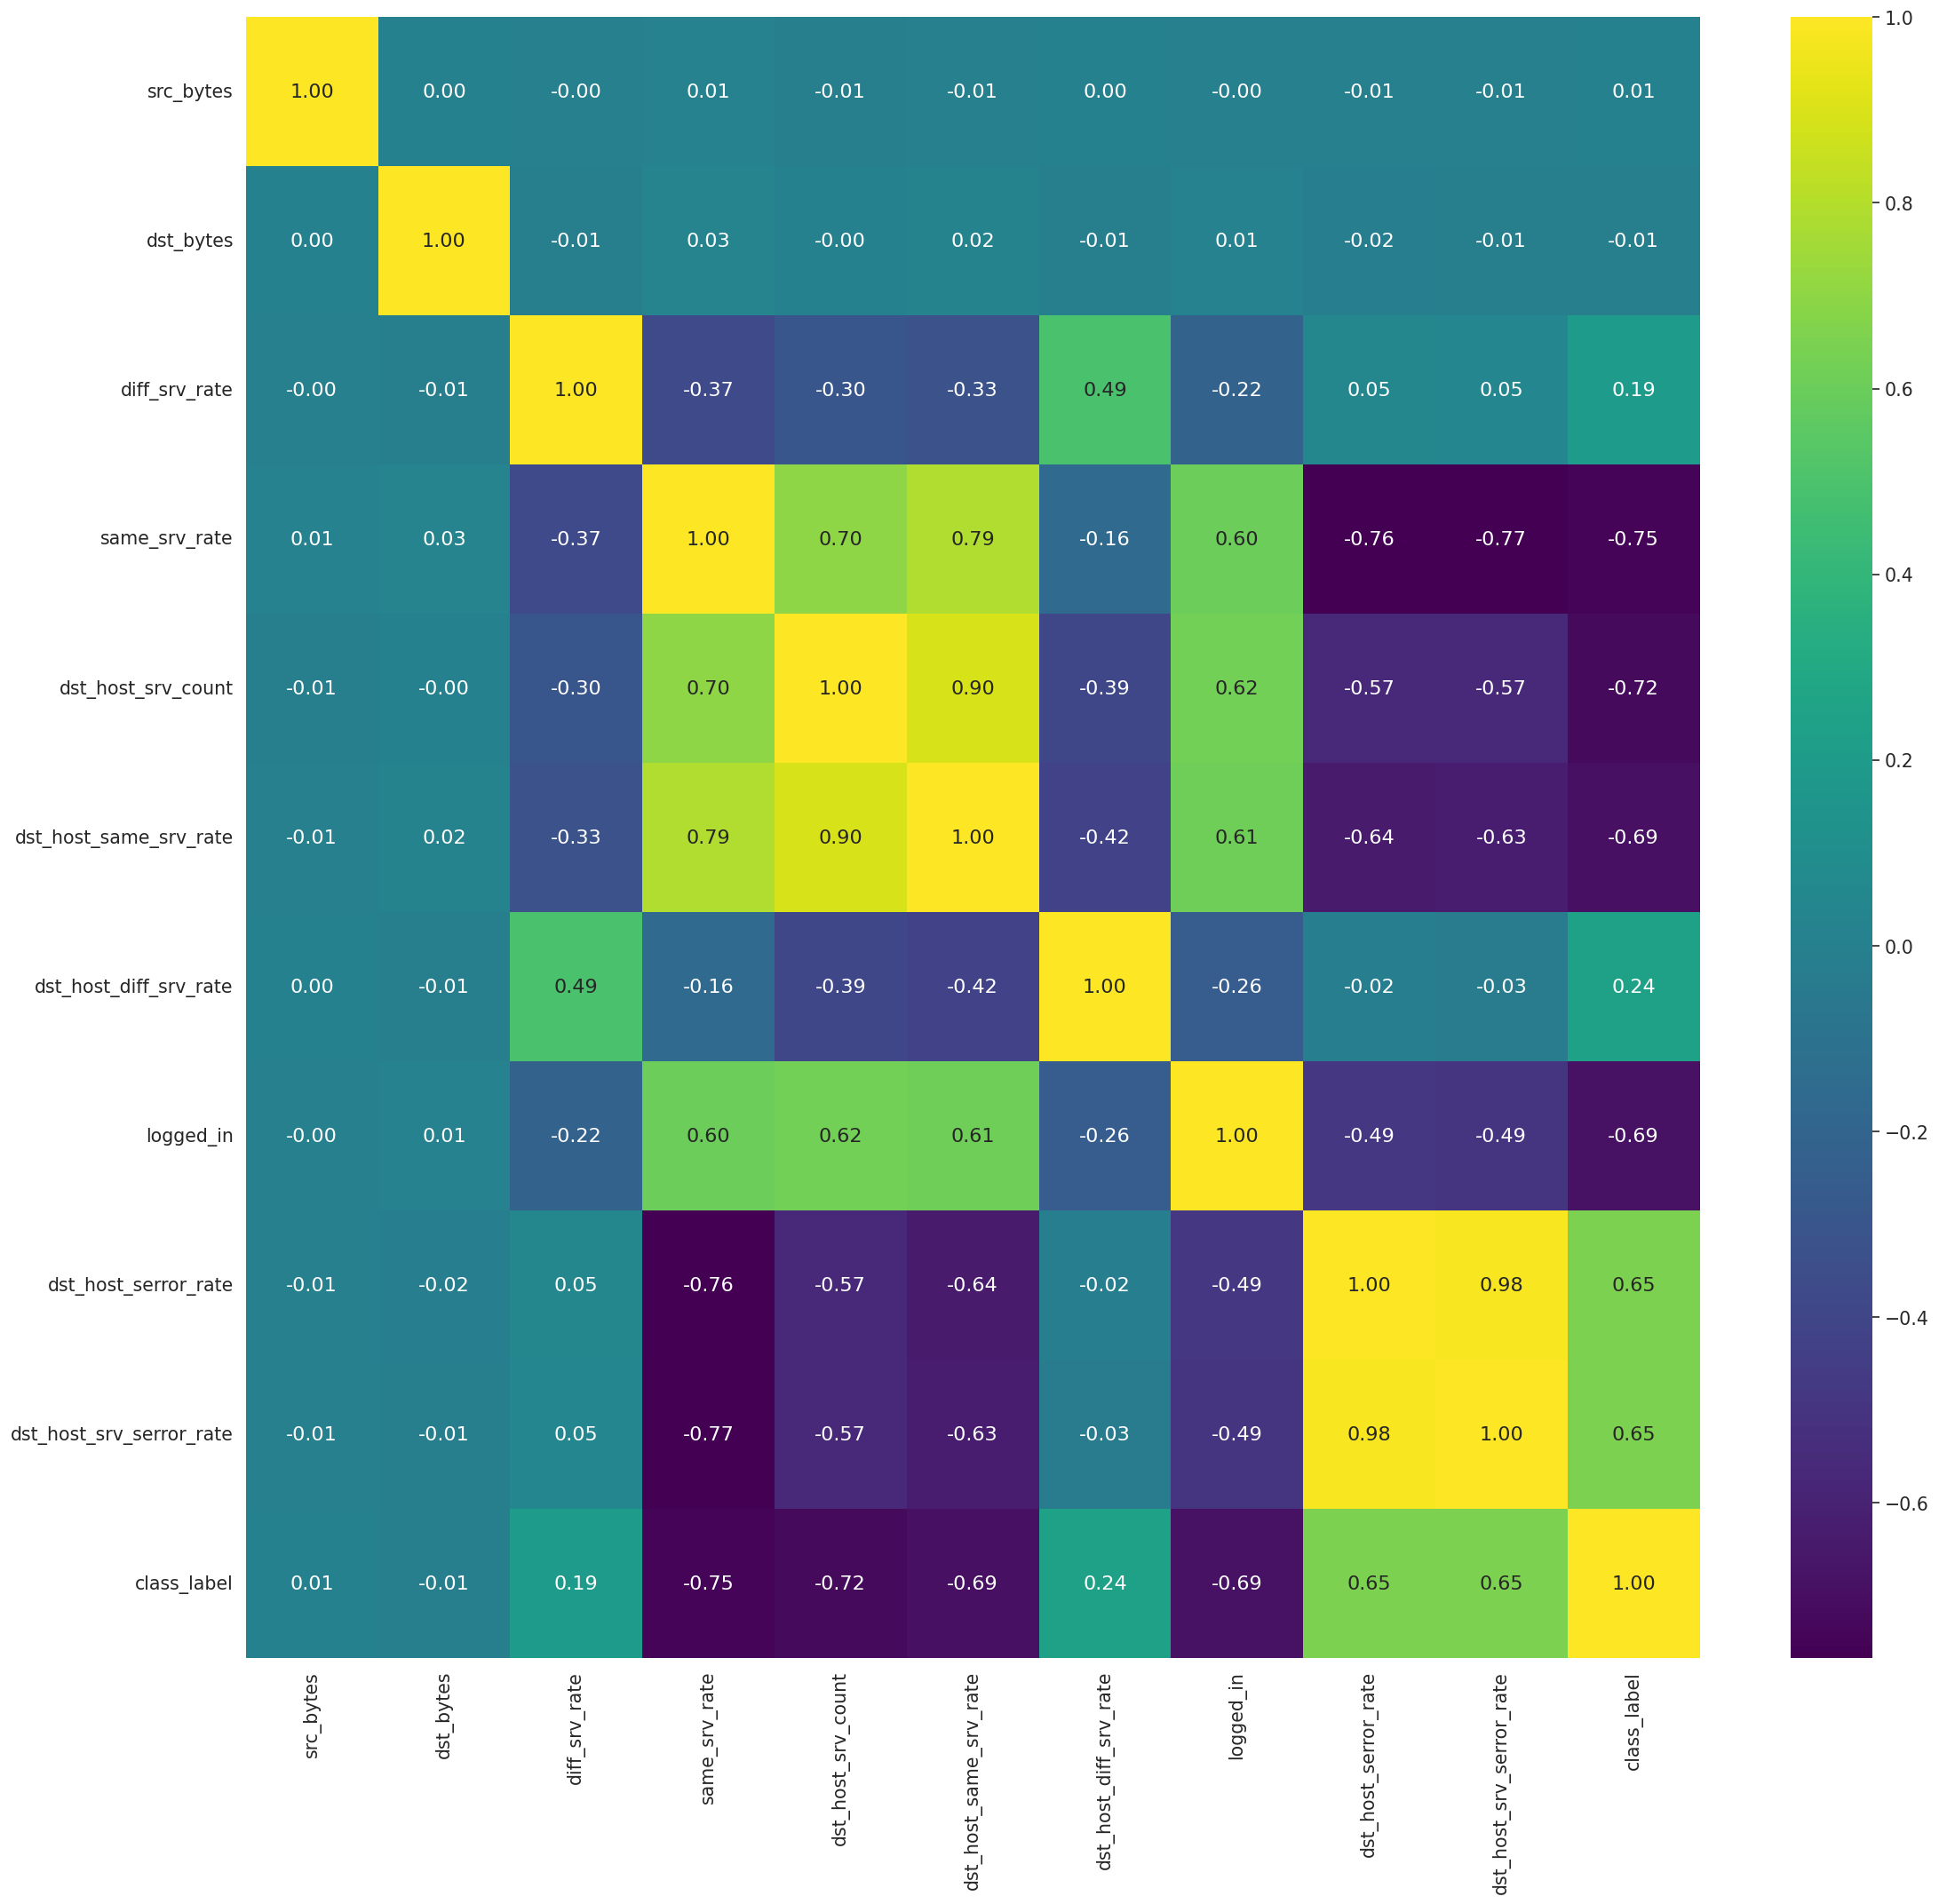

In [17]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

# Splitting Data

In [81]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count', 'class_label']]

In [82]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [84]:
y_train.value_counts()

0    10794
1     9359
Name: class_label, dtype: int64

# Genetic Algorithm - Feature Selection

In [77]:
def init_pop(size, num_features):
  population = []
  for i in range(size):
      chromosome = np.ones(num_features,dtype=bool)
      chromosome[:int(0.3*num_features)]=False
      np.random.shuffle(chromosome)
      population.append(chromosome)
  return population

In [84]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [85]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [86]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

In [87]:
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [88]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=init_pop(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [89]:
z = X.shape[1]
z

10

In [ ]:
logmodel = SVM_classifier
chromo_df_bc, score_bc = generations(X,y,size=80, n_feat=X.shape[1], n_parents=64,
                                  mutation_rate=0.20,n_gen=5, X_train = X_train,
                                  X_test = X_test, y_train = y_train, y_test = y_test)

# Support Vector Machine

## Train SVM

In [85]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [86]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [87]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.531705395825128


In [88]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.76566811194324


In [89]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.5008396305625524


In [90]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.3486519929101656


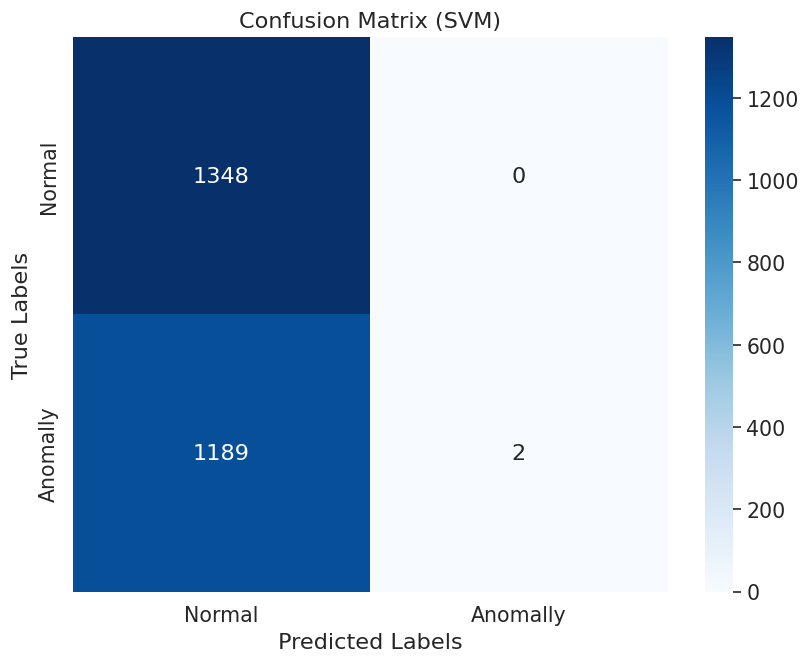

In [91]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [55]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.24      0.39      1307
           1       0.55      1.00      0.71      1232

    accuracy                           0.61      2539
   macro avg       0.77      0.62      0.55      2539
weighted avg       0.78      0.61      0.55      2539



## ROC Curve

The AUC is 0.905
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.000 vs 0.002
0.938	0.000 vs 0.018
0.936	0.001 vs 0.018
0.869	0.001 vs 0.028
0.857	0.007 vs 0.028
0.855	0.007 vs 0.029
0.852	0.010 vs 0.029
0.852	0.010 vs 0.030
0.851	0.011 vs 0.030
0.850	0.011 vs 0.031
0.849	0.016 vs 0.031
0.848	0.019 vs 0.031
0.848	0.020 vs 0.031
0.848	0.020 vs 0.032
0.847	0.021 vs 0.032
0.847	0.021 vs 0.034
0.846	0.024 vs 0.034
0.846	0.025 vs 0.034
0.846	0.025 vs 0.034
0.845	0.028 vs 0.034
0.844	0.028 vs 0.036
0.844	0.029 vs 0.036
0.844	0.029 vs 0.037
0.843	0.031 vs 0.037
0.843	0.031 vs 0.037
0.843	0.032 vs 0.037
0.843	0.032 vs 0.040
0.842	0.033 vs 0.040
0.842	0.033 vs 0.041
0.842	0.036 vs 0.041
0.841	0.036 vs 0.043
0.841	0.037 vs 0.043
0.839	0.041 vs 0.043
0.839	0.041 vs 0.044
0.839	0.045 vs 0.044
0.839	0.045 vs 0.045
0.839	0.046 vs 0.045
0.838	0.046 vs 0.046
0.837	0.046 vs 0.047
0.836	0.046 vs 0.050
0.836	0.049 vs 0.050
0.835	0.050 vs 0.050
0.834	0.056 vs 0.050
0.834	0.056 vs 0.051
0.834	0.058 vs 0.

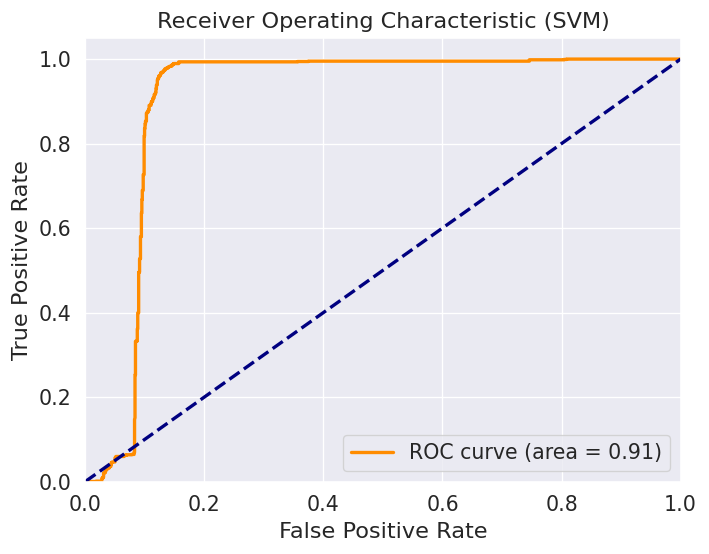

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

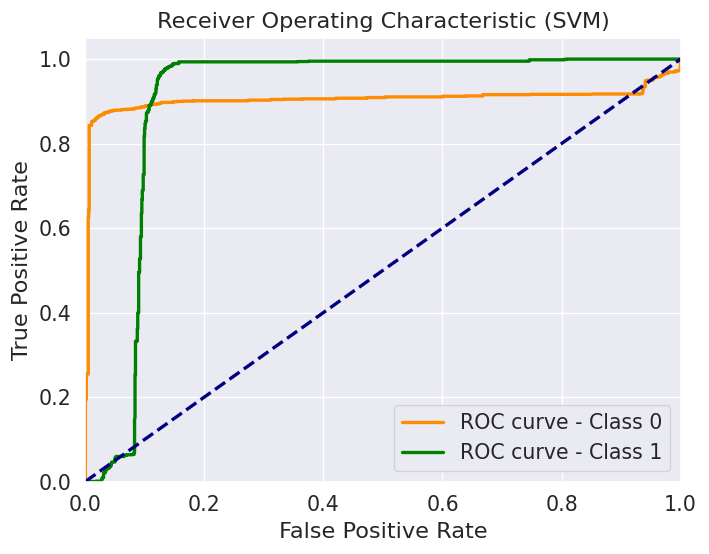

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [58]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [59]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.58


# Decision Tree

## Hyper Parameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# Create a decision tree classifier
DT_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


## Train Decision Tree

In [ ]:
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
                                       min_samples_leaf=1, min_samples_split=2)
DT_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

## Measure Decision Tree's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

0.8783294268058811


In [ ]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

0.6850950519635571


In [ ]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

0.7392795414978082


In [ ]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

0.7066922835868811


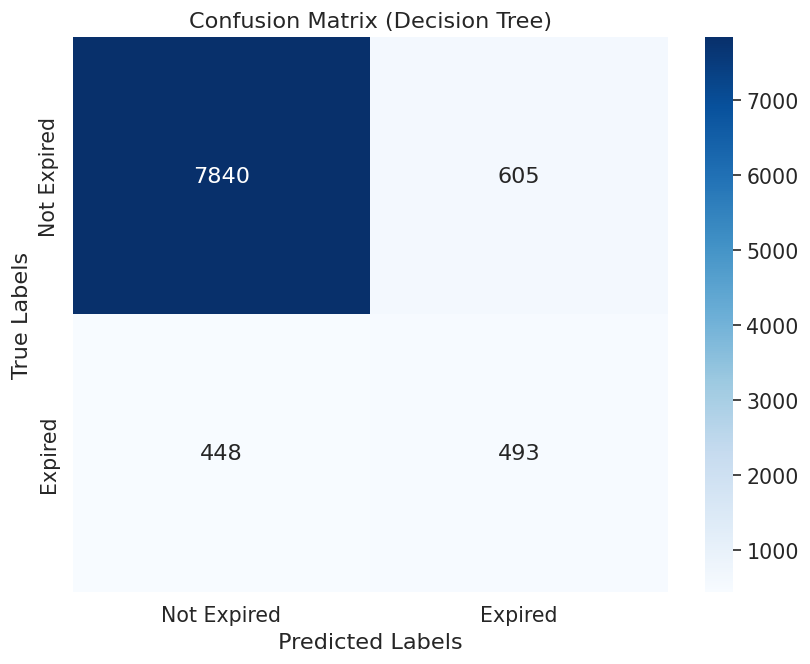

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8445
           1       0.45      0.52      0.48       941

    accuracy                           0.89      9386
   macro avg       0.70      0.73      0.71      9386
weighted avg       0.90      0.89      0.89      9386



## ROC Curve

The AUC is 0.727
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.524 vs 0.072
0.125	0.525 vs 0.072
0.000	1.000 vs 1.000


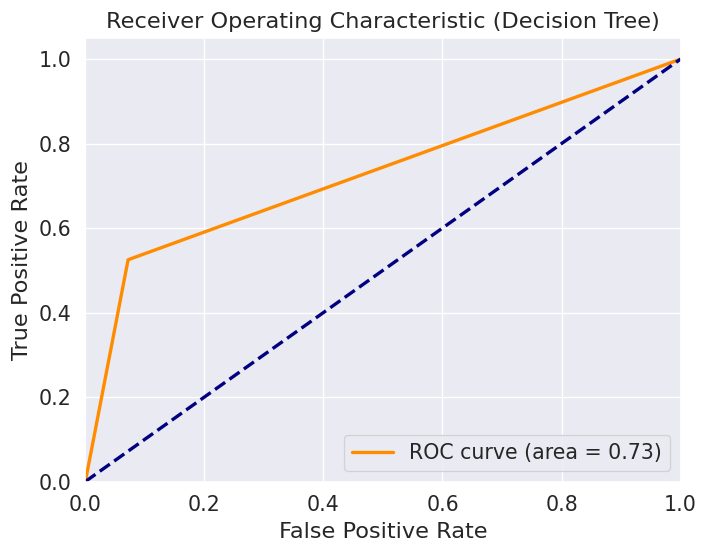

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

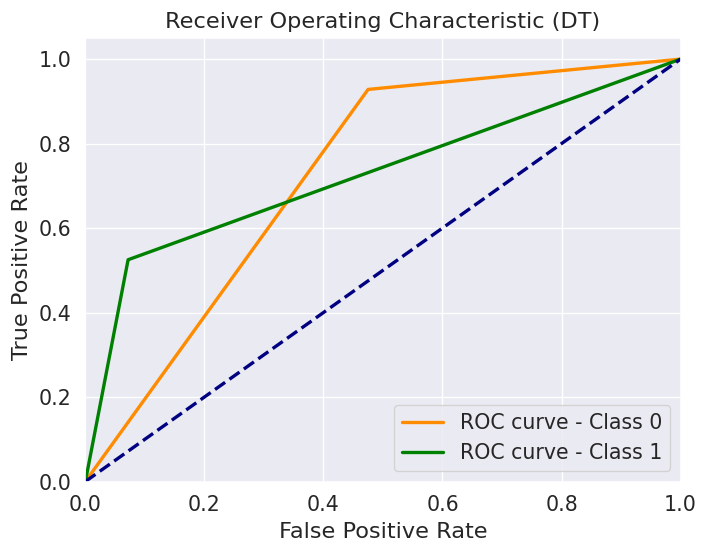

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = DT_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# Random Forrest

## Hyper Parameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
RF_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Train Random Forrest

In [ ]:
RF_classifier = RandomForestClassifier(criterion='entropy', min_samples_leaf=1,
                                       min_samples_split=2, n_estimators=2500)
RF_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=2500)

### Cross Validation & KFold

In [ ]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(RF_classifier, X_test, y_test, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())

Cross-Validation Accuracy Scores: [0.93024494 0.93180607 0.93606819 0.93766649 0.93606819]
Mean Accuracy: 0.93437077837598


## Measure Random Forrest's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

0.9229703814191349


In [ ]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

0.7868298370073439


In [ ]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

0.7843892688138351


In [ ]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

0.7856023287376113


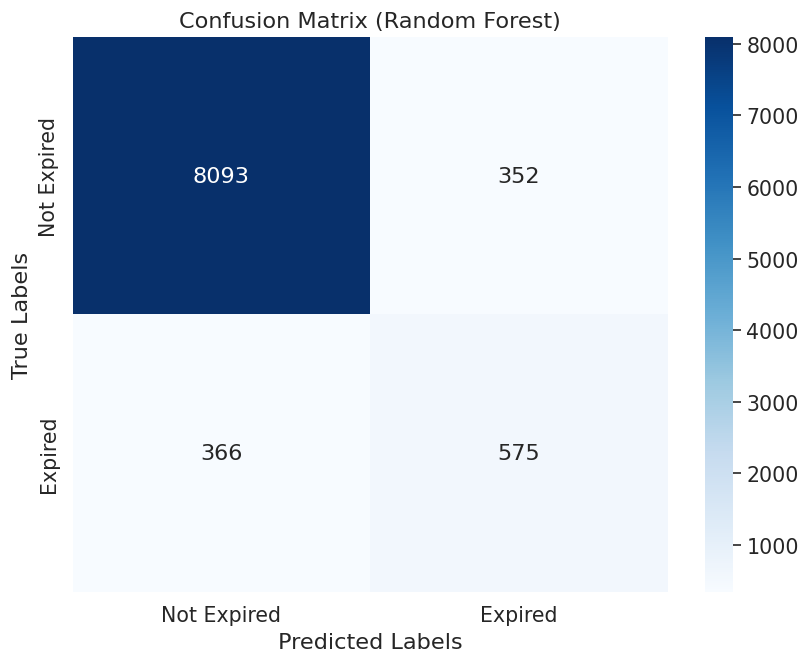

In [ ]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_RF)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8445
           1       0.62      0.61      0.62       941

    accuracy                           0.92      9386
   macro avg       0.79      0.78      0.79      9386
weighted avg       0.92      0.92      0.92      9386



## ROC Curve

The AUC is 0.919
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.012 vs 0.000
0.997	0.029 vs 0.000
0.993	0.045 vs 0.000
0.990	0.058 vs 0.000
0.987	0.073 vs 0.000
0.986	0.073 vs 0.000
0.983	0.085 vs 0.000
0.980	0.094 vs 0.000
0.977	0.105 vs 0.000
0.973	0.113 vs 0.000
0.970	0.116 vs 0.000
0.967	0.126 vs 0.000
0.963	0.134 vs 0.000
0.960	0.142 vs 0.000
0.957	0.147 vs 0.000
0.950	0.162 vs 0.000
0.947	0.164 vs 0.000
0.943	0.167 vs 0.001
0.940	0.172 vs 0.001
0.933	0.187 vs 0.001
0.930	0.192 vs 0.001
0.923	0.199 vs 0.001
0.920	0.202 vs 0.001
0.917	0.206 vs 0.001
0.913	0.211 vs 0.001
0.910	0.213 vs 0.001
0.907	0.216 vs 0.001
0.903	0.220 vs 0.001
0.900	0.226 vs 0.001
0.897	0.228 vs 0.002
0.893	0.231 vs 0.002
0.890	0.236 vs 0.002
0.889	0.237 vs 0.002
0.887	0.241 vs 0.002
0.883	0.250 vs 0.002
0.880	0.254 vs 0.002
0.877	0.261 vs 0.002
0.873	0.264 vs 0.002
0.870	0.266 vs 0.002
0.867	0.269 vs 0.002
0.863	0.272 vs 0.003
0.860	0.274 vs 0.003
0.857	0.279 vs 0.003
0.850	0.288 vs 0.003
0.847	0.292 vs 0.

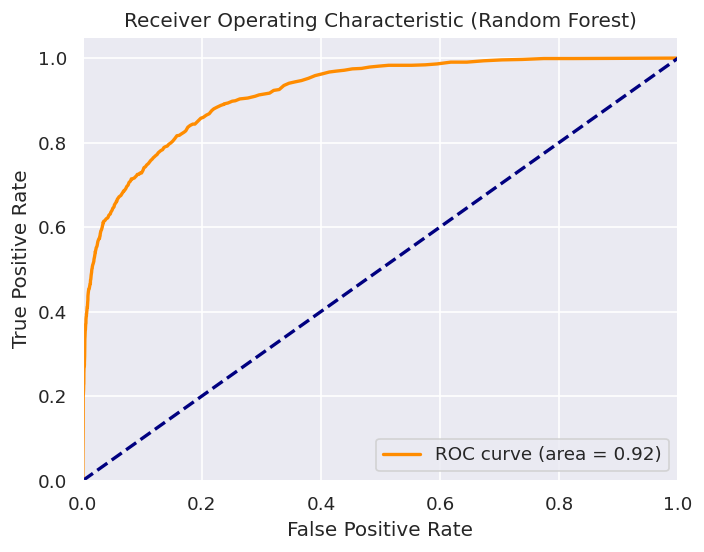

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

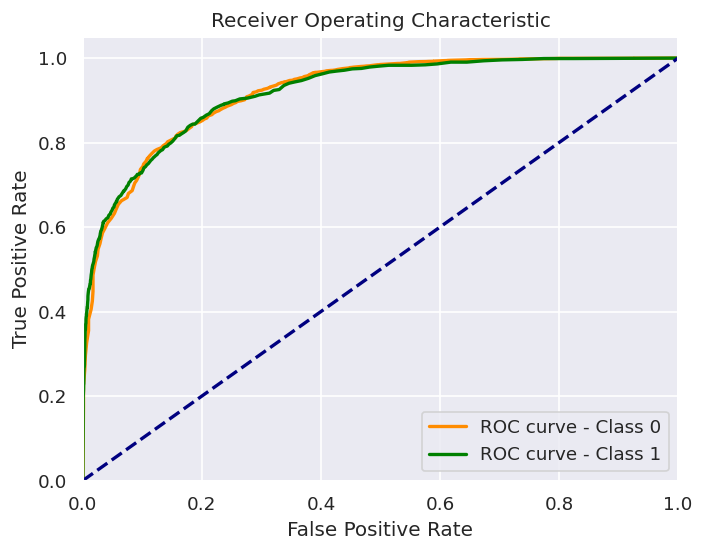

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = RF_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

0.9


# Neural Network

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

input_dim   = X_train.shape[1]

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch {}: Loss - {:.4f}, Accuracy - {:.4f}".format(epoch+1, logs['loss'], logs['accuracy']))

## Hyper Parameter Tuning

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch

epochNo = 10
batchSize = 100

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(input_dim)))
    model.add(Dense(units=hp.Int('units1', min_value=2048, max_value=4196, step=256), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=1024, max_value=2048, step=128), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units3', min_value=512, max_value=1024, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='my_dir',  # Directory to save optimization logs and checkpoints
    project_name='opt_2'
)

tuner.search(X_train_resampled, y_train_resampled, epochs=epochNo, batch_size=batchSize, validation_data=(X_test, y_test))

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters_list = best_hps.values
print("Best Hyperparameters:", best_hyperparameters_list)

Best Hyperparameters: {'units1': 1792, 'dropout_rate1': 0.2, 'units2': 896, 'dropout_rate2': 0.2, 'units3': 320, 'dropout_rate3': 0.30000000000000004}


In [ ]:
predictions = model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1

294/294 [==============================] - 1s 3ms/step


## Using a FNN

In [ ]:
n_neurons_1   = 3328
n_neurons_2   = 2048
n_neurons_3   = 960
epochNo      =  100
batchSize = 100

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim))) # tf.keras.Input() is used to instantiate a Keras tensor.
model.add(Dense(n_neurons_1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_neurons_2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_neurons_3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation=tf.keras.activations.sigmoid))

callbacks = [CustomCallback()]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=epochNo, batch_size=batchSize, verbose=3, callbacks=callbacks)

predictions = model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1
scores = model.evaluate(X_test, y_test)
print('The evaluation scores are {}'.format(scores))
model.save("model.h5")
loaded_model = load_model ('model.h5')
loaded_model.summary()

## Measuring the perfomance of the FNN

In [ ]:
loaded_model = load_model ('model.h5')
predictions = loaded_model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1

294/294 [==============================] - 16s 53ms/step


In [ ]:
score_test = accuracy_score(y_test, y_preds_FNN)
print (score_test)

0.9284040059663329


In [ ]:
precision_test = precision_score(y_test, y_preds_FNN, average='macro')
print (precision_test)

0.816721182997243


In [ ]:
recall_test = recall_score(y_test, y_preds_FNN, average='macro')
print (recall_test)

0.7515259392367567


In [ ]:
f1_test =  f1_score(y_test, y_preds_FNN, average='macro')
print(f1_test)

0.7791555702768245


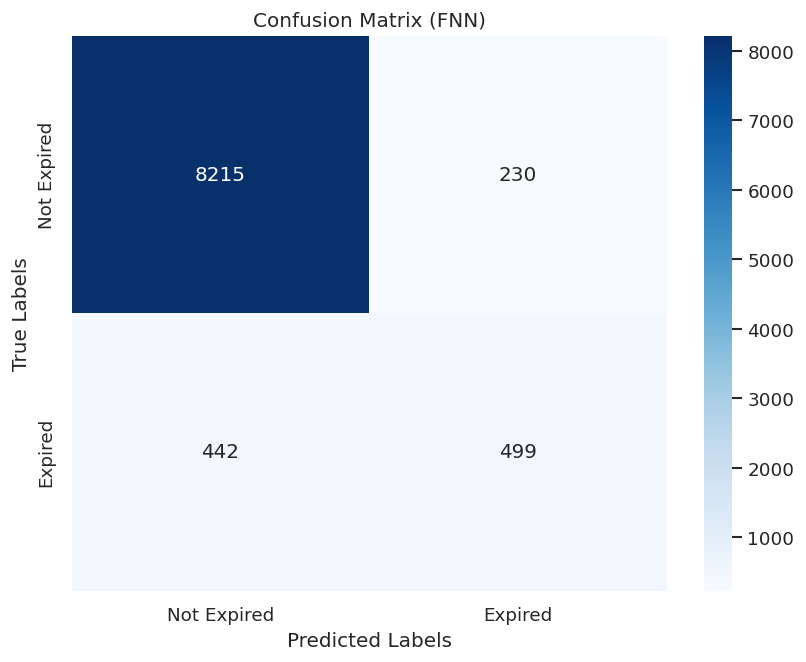

In [ ]:
mat = confusion_matrix(y_test, y_preds_FNN)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (FNN)")
plt.show()

In [ ]:
report = classification_report(y_test, y_preds_FNN)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8445
           1       0.68      0.53      0.60       941

    accuracy                           0.93      9386
   macro avg       0.82      0.75      0.78      9386
weighted avg       0.92      0.93      0.92      9386



## ROC Curve

The AUC is 0.914


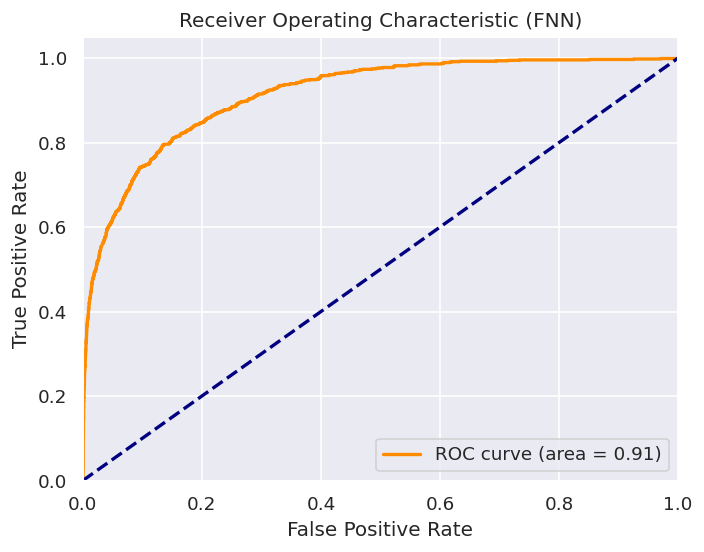

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of the positive class (class 1) using the predict method.
y_probs = predictions
# The predicted probabilities for class 1 are already in y_probs.
# Calculate ROC curve and AUC.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

print('The AUC is {:.3f}'.format(auc))

# Plot ROC curve.
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (FNN)')
plt.legend(loc='lower right')
plt.show()

294/294 [==============================] - 7s 24ms/step


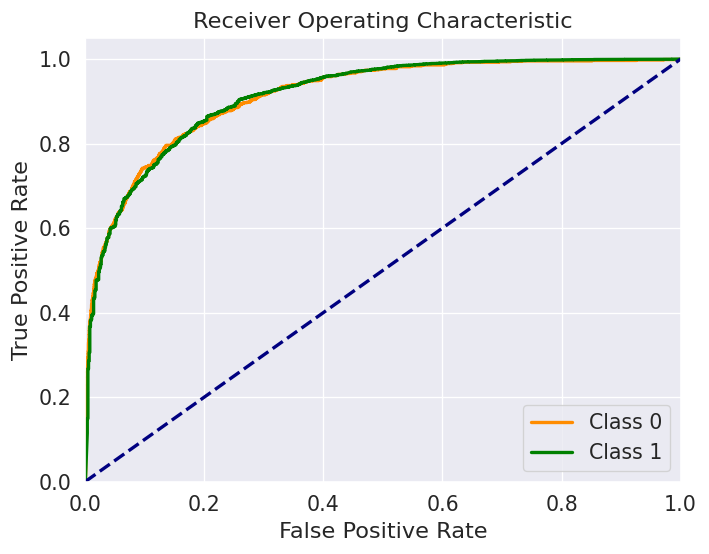

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probabilities from the model
predictions = loaded_model.predict(X_test)

# Ensure predictions is a 2D array with shape (n_samples, n_classes)
if predictions.shape[1] == 1:
    # If predictions have only one column, assume binary classification and create a 2D array
    positive_probs = predictions[:, 0]  # Probabilities for the positive class
    negative_probs = 1 - positive_probs  # Probabilities for the negative class
else:
    # If predictions already have multiple columns, assume they represent probabilities for each class
    positive_probs = predictions[:, 1]  # Probabilities for the positive class
    negative_probs = predictions[:, 0]  # Probabilities for the negative class

# Calculate ROC curve and AUC score for positive class
fpr_positive, tpr_positive, _ = roc_curve(y_test, positive_probs, pos_label=1)
auc_positive = roc_auc_score(y_test, positive_probs)

# Calculate ROC curve and AUC score for negative class
fpr_negative, tpr_negative, _ = roc_curve(y_test, negative_probs, pos_label=0)
auc_negative = roc_auc_score(y_test, negative_probs)

# Plot ROC curves for both positive and negative classes on the same graph
plt.figure()
lw = 2
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=lw, label='Class 0')
plt.plot(fpr_negative, tpr_negative, color='green', lw=lw, label='Class 1')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Measuring performance on small unseen set

In [ ]:
predictions_val = loaded_model.predict(future_sample_X)
y_preds_val = (predictions_val > 0.5)*1     # threshold is 0.5
loss, accuracy = model.evaluate(future_sample_X, future_sample_y)
print('Loss: %.4f, Accuracy: %.2f%%' % (loss, accuracy*100))

2/2 [==============================] - 0s 12ms/step - loss: 0.1544 - accuracy: 0.9600
Loss: 0.1544, Accuracy: 96.00%


# Naive Bayes - Gaussian

## Hyper parameter optimisation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Gaussian Naive Bayes classifier
GNB_classifier = GaussianNB()

# Instantiate GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=GNB_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'var_smoothing': 1e-09}
Best Accuracy Score:  0.7224971212233731


## Train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

0.8992115917323673


In [ ]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

0.720279416177506


In [ ]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

0.7173618884209825


In [ ]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

0.7188064657352111


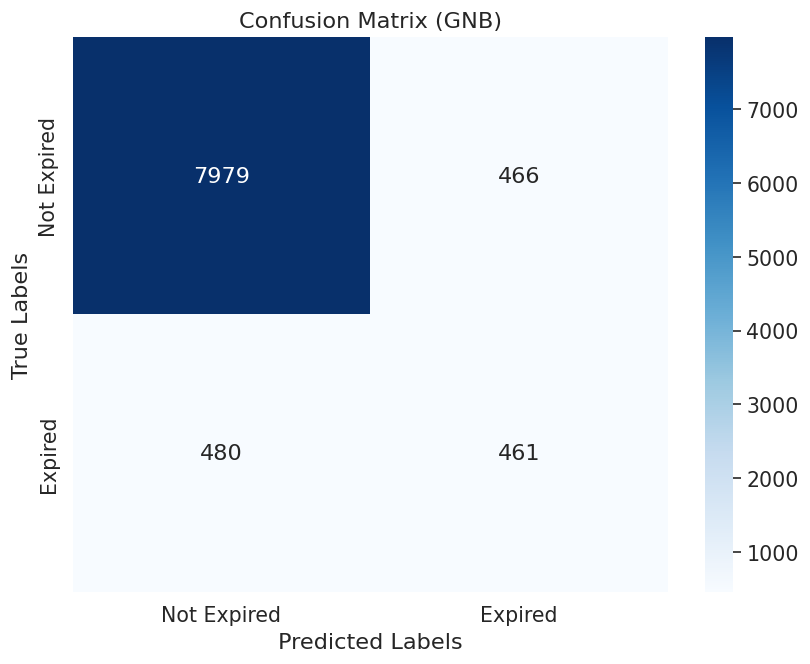

In [ ]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_GNB)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8445
           1       0.50      0.49      0.49       941

    accuracy                           0.90      9386
   macro avg       0.72      0.72      0.72      9386
weighted avg       0.90      0.90      0.90      9386



## ROC Curve

The AUC is 0.849
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.181 vs 0.007
1.000	0.185 vs 0.008
1.000	0.187 vs 0.008
1.000	0.191 vs 0.009
1.000	0.193 vs 0.009
1.000	0.196 vs 0.009
1.000	0.196 vs 0.009
1.000	0.197 vs 0.009
1.000	0.199 vs 0.009
1.000	0.200 vs 0.009
1.000	0.202 vs 0.009
1.000	0.202 vs 0.009
1.000	0.203 vs 0.009
1.000	0.203 vs 0.009
1.000	0.204 vs 0.009
1.000	0.204 vs 0.010
1.000	0.207 vs 0.010
1.000	0.207 vs 0.010
1.000	0.215 vs 0.010
1.000	0.215 vs 0.010
1.000	0.216 vs 0.010
1.000	0.216 vs 0.011
1.000	0.220 vs 0.011
1.000	0.220 vs 0.011
1.000	0.222 vs 0.011
1.000	0.222 vs 0.011
1.000	0.227 vs 0.011
1.000	0.227 vs 0.011
1.000	0.228 vs 0.011
1.000	0.228 vs 0.011
1.000	0.232 vs 0.011
1.000	0.232 vs 0.011
1.000	0.234 vs 0.011
1.000	0.234 vs 0.012
1.000	0.235 vs 0.012
1.000	0.235 vs 0.012
1.000	0.236 vs 0.012
1.000	0.236 vs 0.012
1.000	0.238 vs 0.012
1.000	0.238 vs 0.012
1.000	0.239 vs 0.012
1.000	0.239 vs 0.013
1.000	0.244 vs 0.013
1.000	0.244 vs 0.013
1.000	0.247 vs 0.

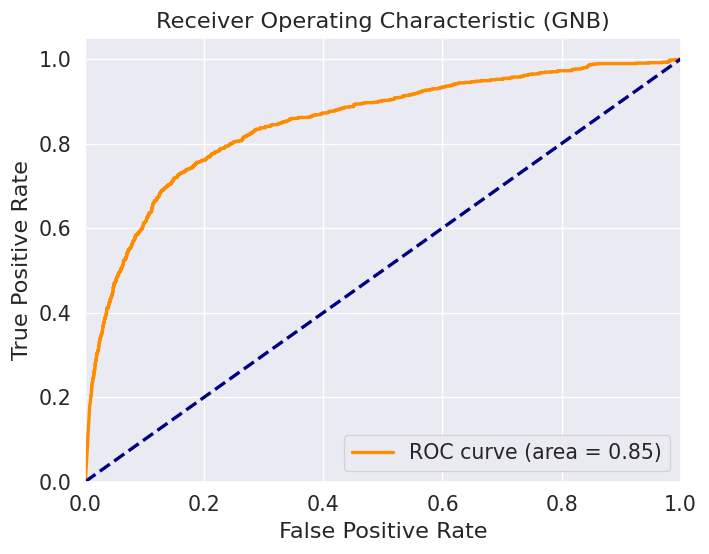

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

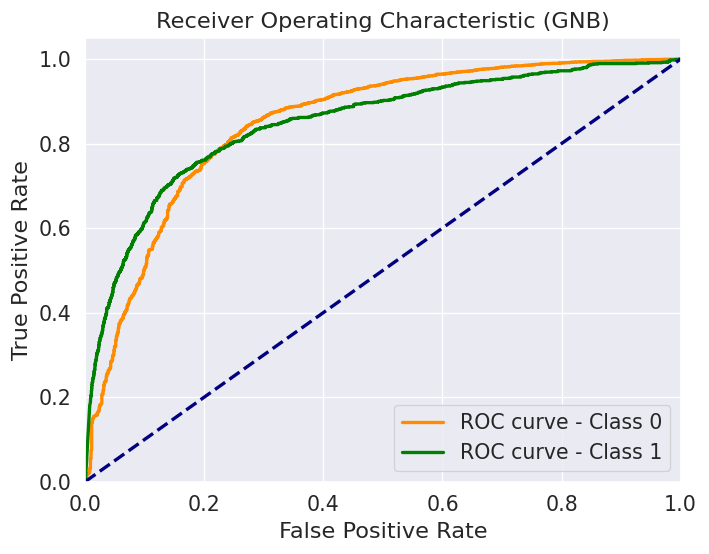

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = GNB_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

0.88


# Run Classifiers

In [ ]:
# # DT
# DT_predictions = DT_classifier.predict(testing_data_set)
# DT_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': DT_predictions})

# # kNN
# KNN_predictions = KNN_classifier.predict(testing_data_set)
# KNN_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': KNN_predictions})

# RF
RF_predictions = RF_classifier.predict(testing_data_set_fs)
RF_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': RF_predictions})

# # # SVM
# SVM_predictions = SVM_classifier.predict(testing_data_set)
# SVM_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': SVM_predictions})

In [ ]:
# FNN
FNN_predictions = loaded_model.predict(testing_data_set)
FNN_predictions_flat = np.array(FNN_predictions).flatten()

# Apply threshold to convert probabilities to binary predictions
threshold = 0.5
binary_predictions = (FNN_predictions_flat > threshold).astype(int)

# Create a dataframe for binary predictions
FNN_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': binary_predictions})

369/369 [==============================] - 7s 19ms/step


In [ ]:
DT_predictions_df

,Predicted-ExpiredHospital
0,0
1,1
2,0
3,0
4,0
...,...
11791,0
11792,1
11793,0
11794,0


In [ ]:
DT_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(DT_predictions_df))]
DT_predictions_df = DT_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
DT_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,1
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,1
11793,Row11793,0
11794,Row11794,0


In [ ]:
KNN_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(KNN_predictions_df))]
KNN_predictions_df = KNN_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
KNN_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,0
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,0
11793,Row11793,0
11794,Row11794,0


In [ ]:
RF_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(RF_predictions_df))]
RF_predictions_df = RF_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
RF_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,1
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,1
11793,Row11793,0
11794,Row11794,1


In [ ]:
SVM_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(SVM_predictions_df))]
SVM_predictions_df = SVM_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
SVM_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,1
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,1
11793,Row11793,0
11794,Row11794,1


In [ ]:
FNN_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(FNN_predictions_df))]
FNN_predictions_df = FNN_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
FNN_predictions_df

,row ID,Predicted-ExpiredHospital
0,Row0,0
1,Row1,0
2,Row2,0
3,Row3,0
4,Row4,0
...,...,...
11791,Row11791,0
11792,Row11792,0
11793,Row11793,0
11794,Row11794,0


## Turn Prediction Dataframes into CSV files

In [ ]:
# DT_predictions_df.to_csv('DT.csv', index=False)
# KNN_predictions_df.to_csv('KNN.csv', index=False)
RF_predictions_df.to_csv('RF.csv', index=False)
# SVM_predictions_df.to_csv('SVM.csv', index=False)
# FNN_predictions_df.to_csv('FNN.csv', index=False)